In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./diabetes.csv')
df = data.copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### 컬럼 정보
* Pregnancies: 임신횟수
* Glucose: 혈당 수치
* BloodPressure: 혈압 수치
* Skin Thickness: 피부의 두께
* Insulin: 혈중 인슐린 수치
* BMI: 체질량지수
* DiabetesPredigreeFunction: 당뇨 내력 가중치 값
* Age:나이 
* Outcome: 클래스 결정 값(0: No, 1: Yes)

### 결측치 확인

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

결측치는 없음

### EDA

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Pregnancies(임신 횟수)

In [7]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

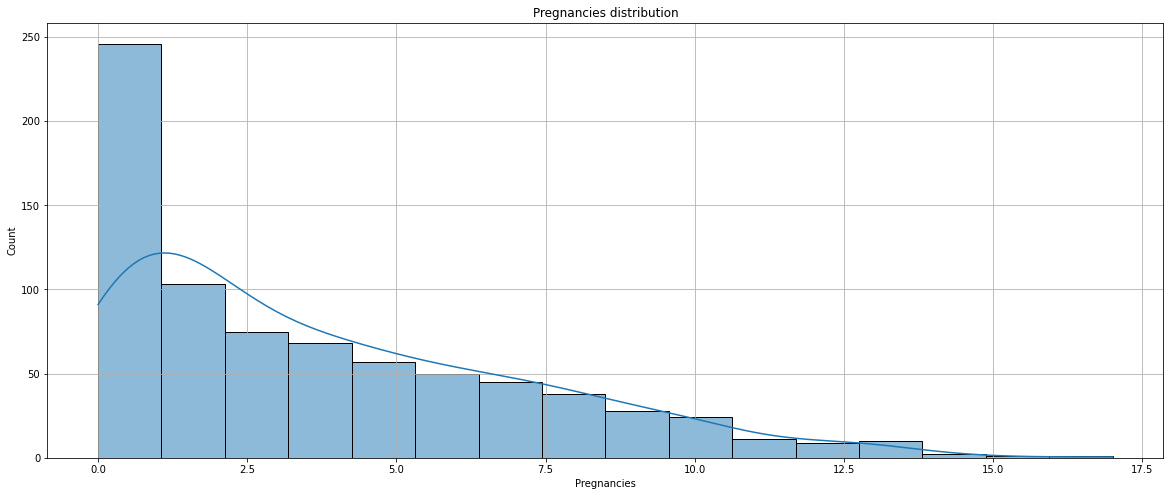

In [21]:
plt.figure(figsize = (20, 8))
ax = sns.histplot(data = df, x = 'Pregnancies', kde = True)
plt.title('Pregnancies distribution')
plt.grid()
plt.show()

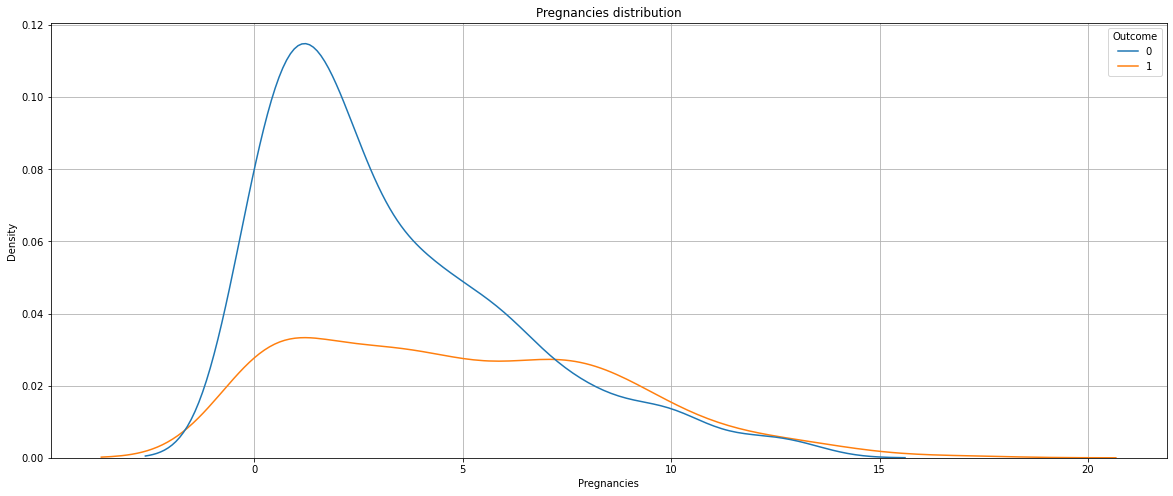

In [18]:
plt.figure(figsize = (20, 8))
ax = sns.kdeplot(data = df, x = 'Pregnancies', hue = 'Outcome')
plt.title('Pregnancies distribution')
plt.grid()
plt.show()

Preganancies의 분포는 다소 왼쪽으로 치우쳐져 있다.

#### 이상치 탐색

In [51]:
def draw_boxplot(df, column):
    plt.figure(figsize = (10, 5))
    sns.boxplot(data = df, x = column)
    plt.title('Boxplot')
    plt.show()

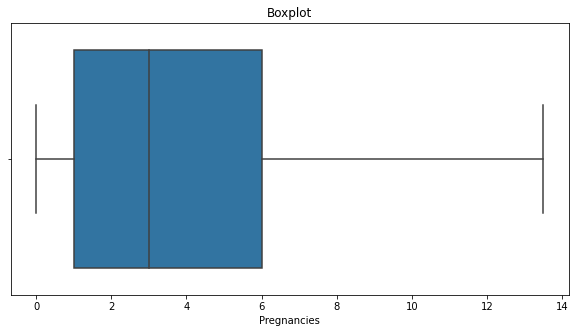

In [52]:
draw_boxplot(df, 'Pregnancies')

#### IQR 이상치 대체

In [48]:
def replace_outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_bound = df[column].quantile(0.75) + iqr * 1.5
    lower_bound = df[column].quantile(0.25) - iqr * 1.5
    
    # lower bound, upper bound를 벗어나는 이상치는 각각 lower bound, upper bound로 대체
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound    
    
    return df

In [49]:
df = replace_outlier(df, 'Pregnancies')

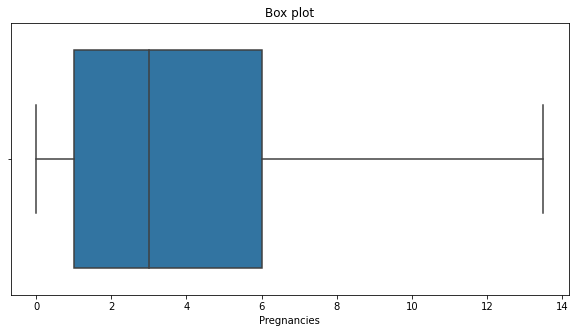

In [50]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = 'Pregnancies')
plt.title('Box plot')
plt.show()

#### Glucose(혈당 수치)

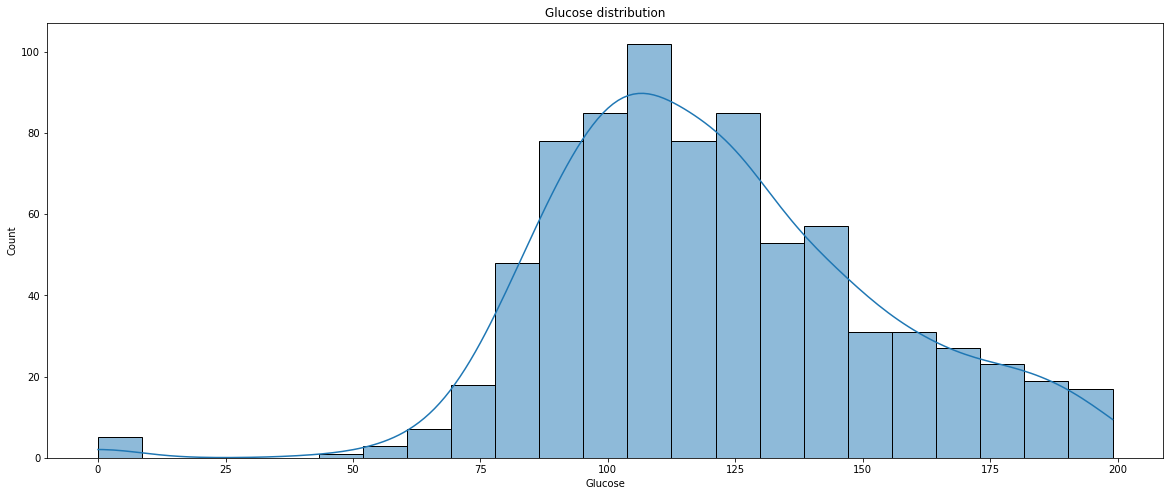

In [45]:
plt.figure(figsize = (20, 8))
sns.histplot(data = df, x = 'Glucose', kde = True)
plt.title('Glucose distribution')
plt.show()

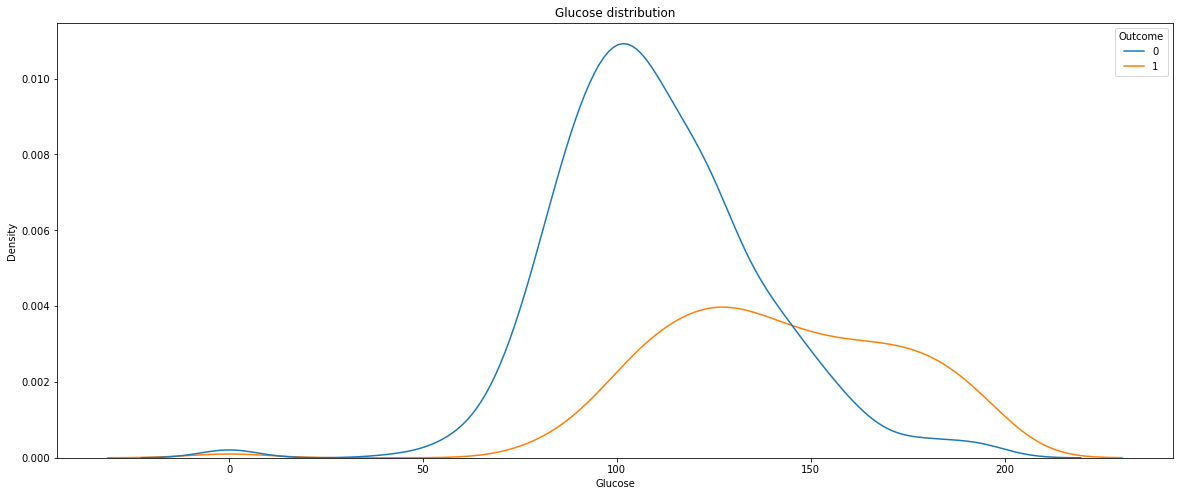

In [47]:
plt.figure(figsize = (20, 8))
sns.kdeplot(data = df, x = 'Glucose', hue = 'Outcome')
plt.title('Glucose distribution')
plt.show()

당뇨에 걸린 환자가 아닌 환자에 비해 Glucose 수치가 높은 구간에 많이 분포된 것을 확인할 수 있다.

#### 이상치 확인

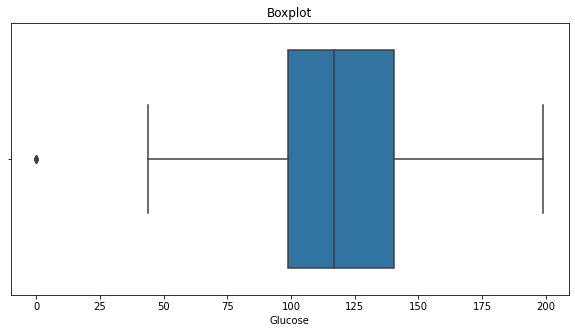

In [53]:
draw_boxplot(df, 'Glucose')

이상치 존재

#### 이상치 대체

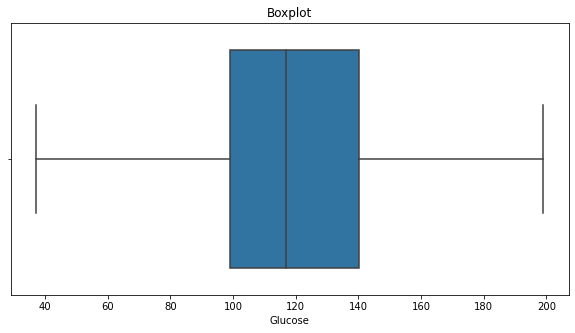

In [54]:
df = replace_outlier(df, 'Glucose')
draw_boxplot(df, 'Glucose')

#### Blood Pressure(혈압 수치)

In [57]:
df['BloodPressure'].describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

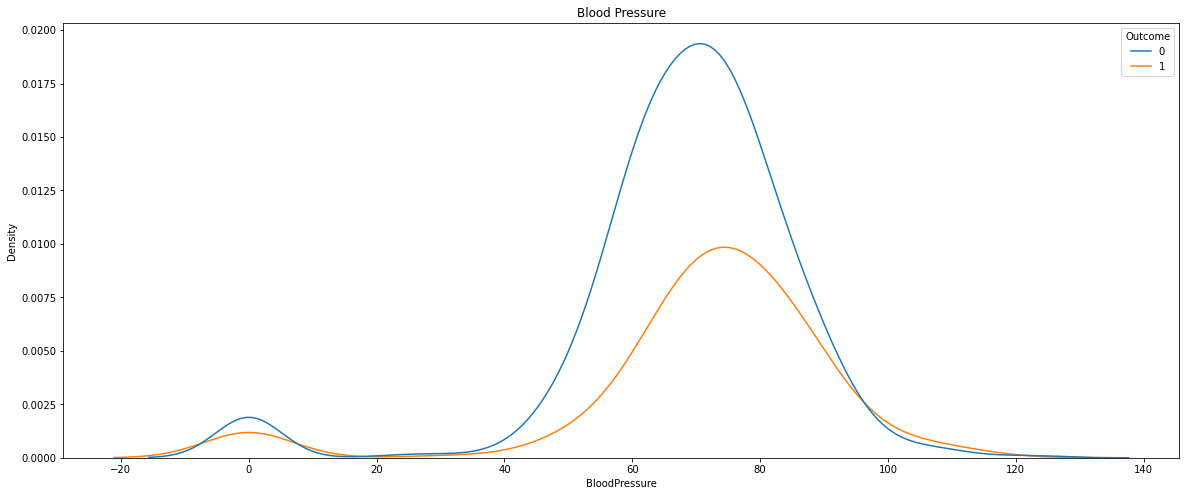

In [55]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'BloodPressure', data = df, hue = 'Outcome')
plt.title('Blood Pressure')
plt.show()

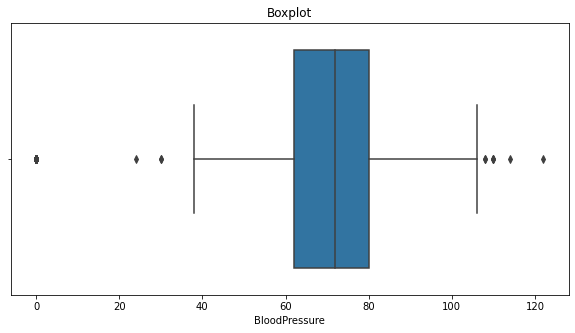

In [60]:
draw_boxplot(df, 'BloodPressure')

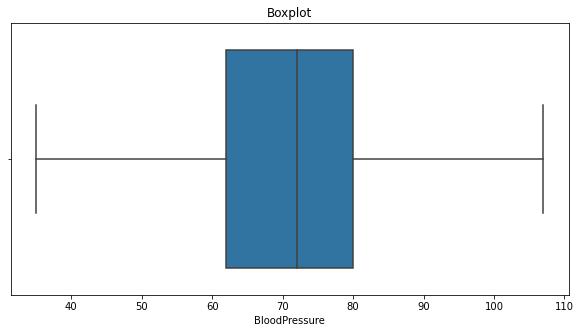

In [61]:
df = replace_outlier(df, 'BloodPressure')
draw_boxplot(df, 'BloodPressure')

새로운 컬럼 혈압 단계를 추가 
* 85미만: 정상혈압 
* 85이상: 고혈압

In [69]:
df['HBP'] = df.apply(lambda x: '정상혈압' 
                     if x['BloodPressure'] < 85
                    else '고혈압', axis = 1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HBP
0,6.0,148.0,72,35,0,33.6,0.627,50,1,정상혈압
1,1.0,85.0,66,29,0,26.6,0.351,31,0,정상혈압
2,8.0,183.0,64,0,0,23.3,0.672,32,1,정상혈압
3,1.0,89.0,66,23,94,28.1,0.167,21,0,정상혈압
4,0.0,137.0,40,35,168,43.1,2.288,33,1,정상혈압
...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,0.171,63,0,정상혈압
764,2.0,122.0,70,27,0,36.8,0.340,27,0,정상혈압
765,5.0,121.0,72,23,112,26.2,0.245,30,0,정상혈압
766,1.0,126.0,60,0,0,30.1,0.349,47,1,정상혈압


#### 정상혈압과 고혈압 비율 확인


In [108]:
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic'

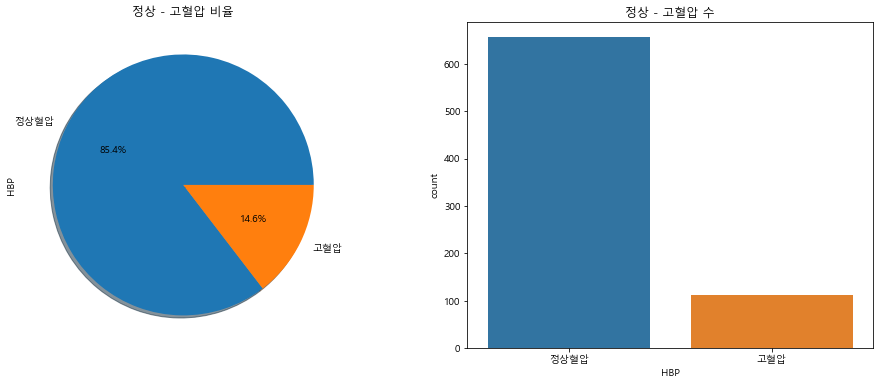

In [116]:
f, ax = plt.subplots(1, 2, figsize = (16, 6))
df['HBP'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('정상 - 고혈압 비율')

sns.countplot(x = 'HBP', data = df, ax = ax[1])
ax[1].set_title('정상 - 고혈압 수')

plt.show()

#### 혈압별 당뇨환자 비율

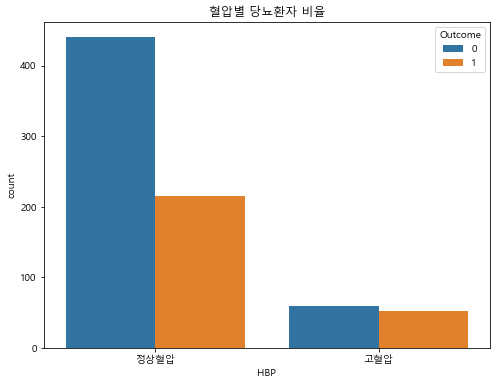

In [120]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'HBP', data = df, hue = 'Outcome')
plt.title('혈압별 당뇨환자 비율')
plt.show()

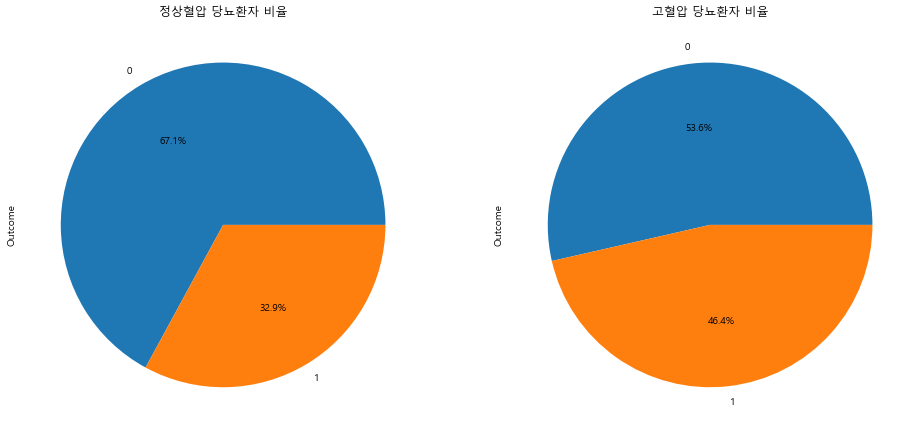

In [132]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))

df[df['HBP'] == '정상혈압']['Outcome'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('정상혈압 당뇨환자 비율')

df[df['HBP'] == '고혈압']['Outcome'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[1])
ax[1].set_title('고혈압 당뇨환자 비율')

plt.show()

* 정상혈압 당뇨환자 비율 = 32.9%
* 고혈압 당뇨환자 비율 = 46.4%  

> 고혈압인 사람이 아닌 사람에 비해 당뇨에 걸릴 확률이 높다고 볼 수 있음

#### Skin Thickness(피부의 두께)

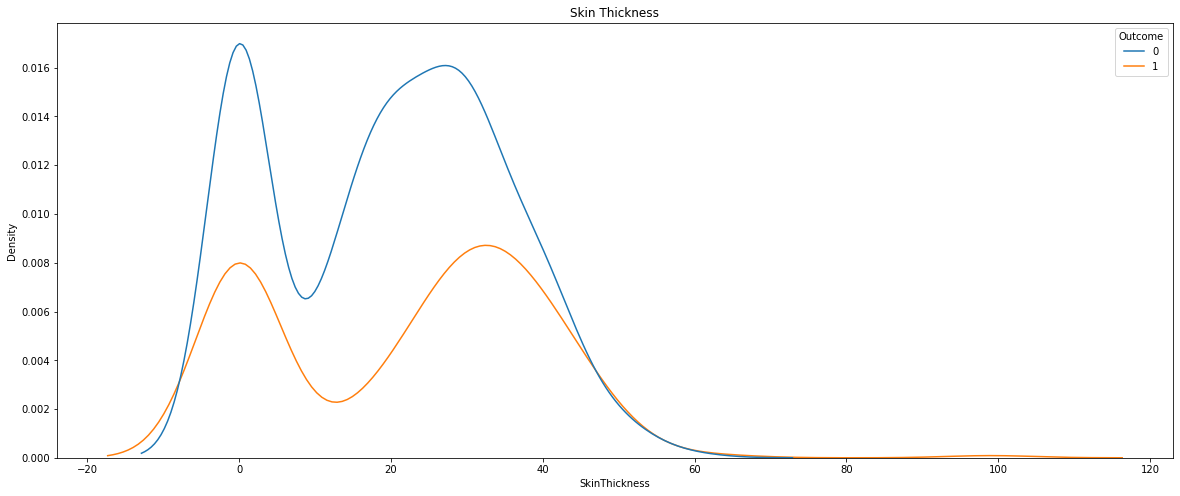

In [63]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'SkinThickness', data = df, hue = 'Outcome')
plt.title('Skin Thickness')
plt.show()

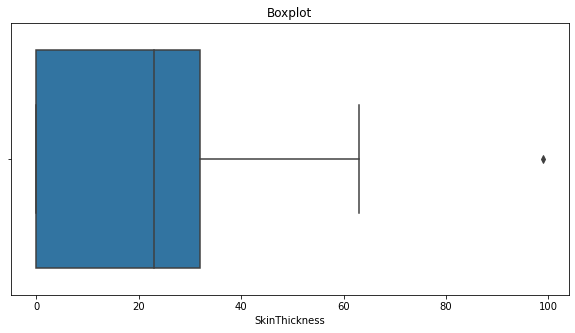

In [65]:
draw_boxplot(df, 'SkinThickness')

#### 피부 두께 컬럼을 추가
* 중간값: 보통
* 중간값 보다 작음: 얇음
* 중간값 보다 두꺼움: 두꺼움

In [139]:
mid = df['SkinThickness'].quantile(0.5)

def get_thickness(skin):
    if skin > mid:
        return '두꺼움'
    else:
        return '얇음'

In [140]:
df['SkinGrade'] = df['SkinThickness'].apply(get_thickness)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HBP,SkinGrade
0,6.0,148.0,72,35,0,33.6,0.627,50,1,정상혈압,두꺼움
1,1.0,85.0,66,29,0,26.6,0.351,31,0,정상혈압,두꺼움
2,8.0,183.0,64,0,0,23.3,0.672,32,1,정상혈압,얇음
3,1.0,89.0,66,23,94,28.1,0.167,21,0,정상혈압,얇음
4,0.0,137.0,40,35,168,43.1,2.288,33,1,정상혈압,두꺼움
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180,32.9,0.171,63,0,정상혈압,두꺼움
764,2.0,122.0,70,27,0,36.8,0.340,27,0,정상혈압,두꺼움
765,5.0,121.0,72,23,112,26.2,0.245,30,0,정상혈압,얇음
766,1.0,126.0,60,0,0,30.1,0.349,47,1,정상혈압,얇음


#### 피부 두께의 비율

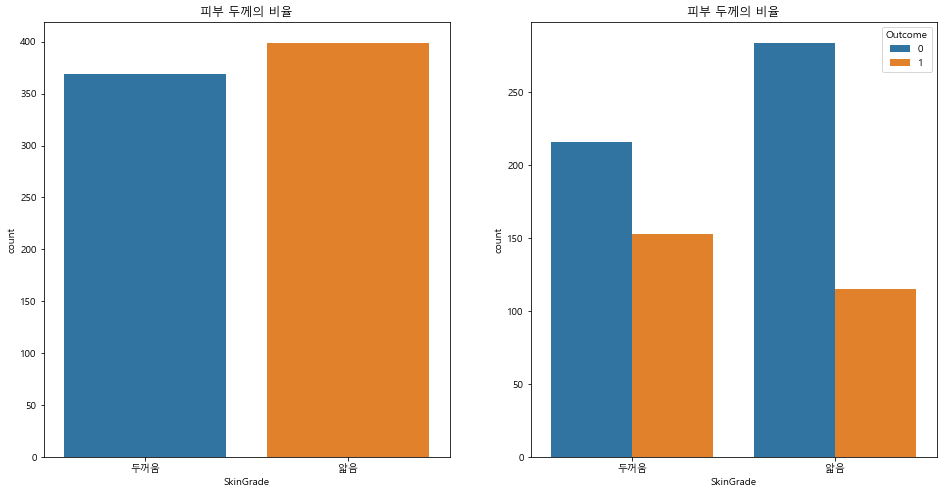

In [141]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.countplot(x = 'SkinGrade', data = df, ax = ax[0])
ax[0].set_title('피부 두께의 비율')

sns.countplot(x = 'SkinGrade', data = df, hue = 'Outcome', ax = ax[1])
ax[1].set_title('피부 두께의 비율')
plt.show()

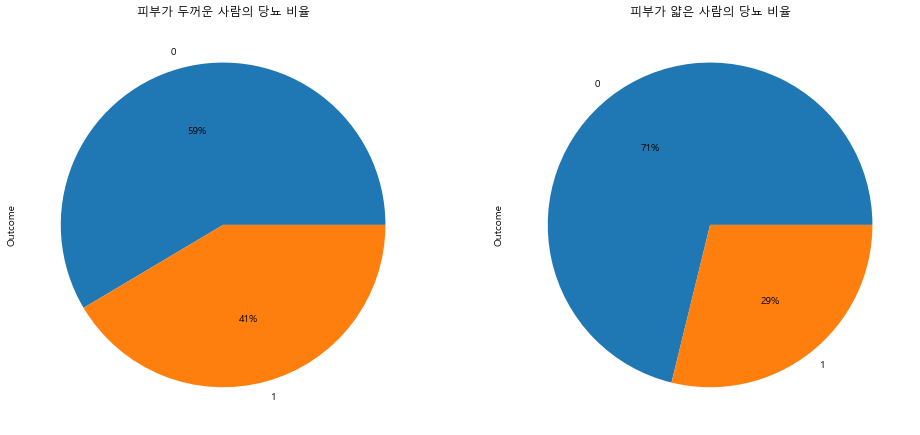

In [142]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
df[df['SkinGrade'] == '두꺼움']['Outcome'].value_counts().plot.pie(autopct = '%1.f%%', ax = ax[0])
ax[0].set_title('피부가 두꺼운 사람의 당뇨 비율')

df[df['SkinGrade'] == '얇음']['Outcome'].value_counts().plot.pie(autopct = '%1.f%%', ax = ax[1])
ax[1].set_title('피부가 얇은 사람의 당뇨 비율')

plt.show()

피부가 두꺼운 사람이 얇은 사람보다 당뇨에 걸릴 확률이 높아 보인다.

#### Insulin(혈중 인슐린 수치)

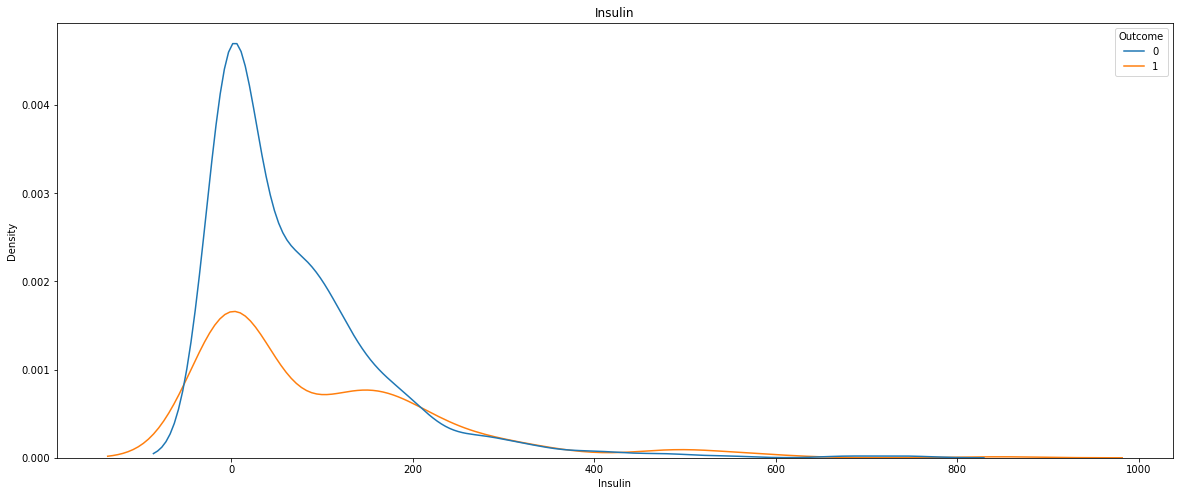

In [68]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'Insulin', data = df, hue = 'Outcome')
plt.title('Insulin')
plt.show()

분포가 많이 치우친 것으로 보인다.

#### 이상치 탐색

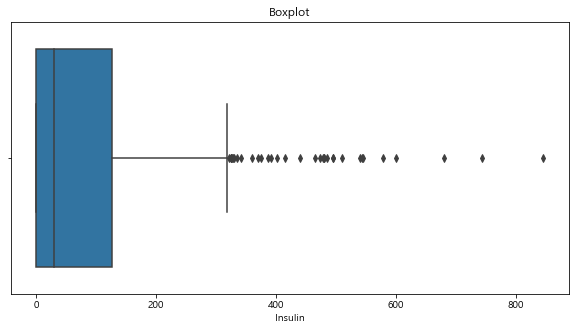

In [147]:
draw_boxplot(df, 'Insulin')

#### 이상치 제거

In [148]:
df = replace_outlier(df, 'Insulin')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HBP,SkinGrade
0,6.0,148.0,72,35,0.0,33.6,0.627,50,1,정상혈압,두꺼움
1,1.0,85.0,66,29,0.0,26.6,0.351,31,0,정상혈압,두꺼움
2,8.0,183.0,64,0,0.0,23.3,0.672,32,1,정상혈압,얇음
3,1.0,89.0,66,23,94.0,28.1,0.167,21,0,정상혈압,얇음
4,0.0,137.0,40,35,168.0,43.1,2.288,33,1,정상혈압,두꺼움
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76,48,180.0,32.9,0.171,63,0,정상혈압,두꺼움
764,2.0,122.0,70,27,0.0,36.8,0.340,27,0,정상혈압,두꺼움
765,5.0,121.0,72,23,112.0,26.2,0.245,30,0,정상혈압,얇음
766,1.0,126.0,60,0,0.0,30.1,0.349,47,1,정상혈압,얇음


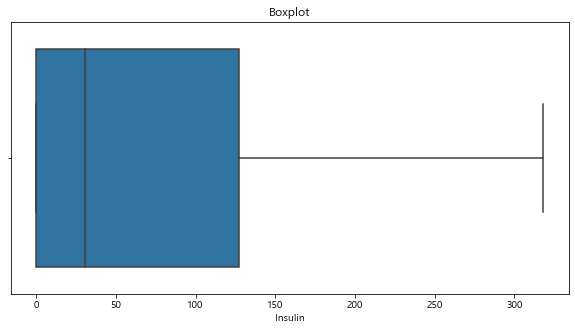

In [149]:
draw_boxplot(df, 'Insulin')

#### BMI(체질량지수)

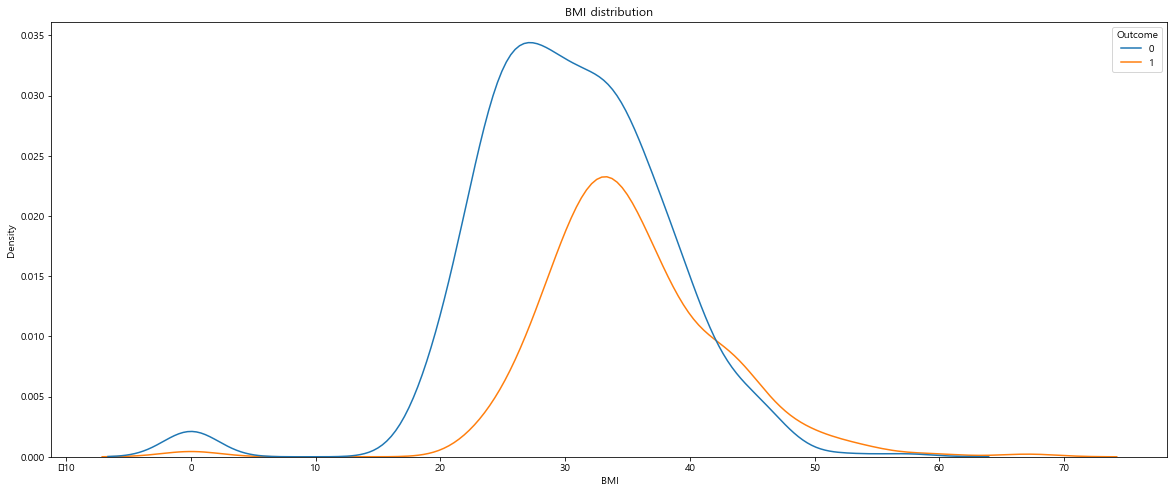

In [152]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'BMI', data = df, hue = 'Outcome')
plt.title('BMI distribution')
plt.show()

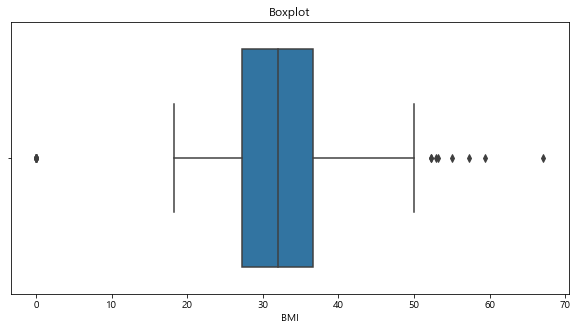

In [153]:
draw_boxplot(df, 'BMI')

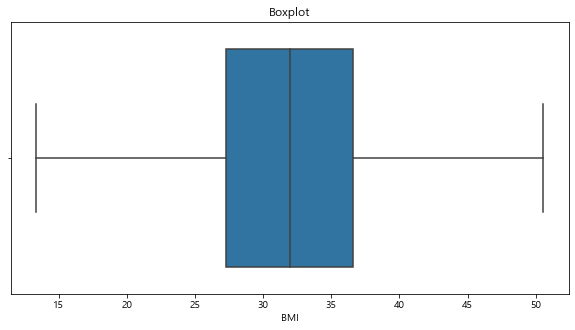

In [154]:
df = replace_outlier(df, 'BMI')
draw_boxplot(df, 'BMI')

#### Diabetes Pedigree Function(체질량지수)

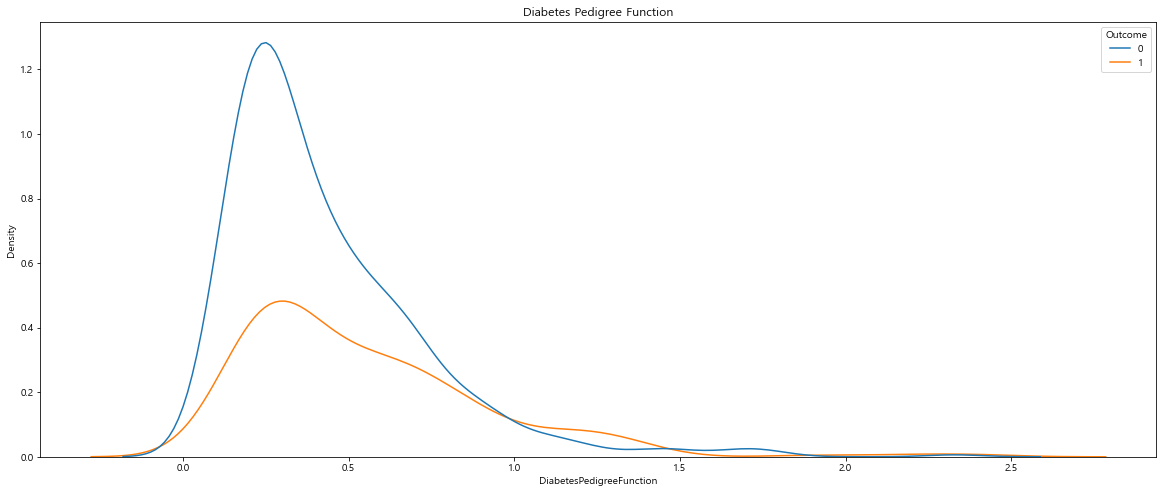

In [156]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'DiabetesPedigreeFunction', data = df, hue = 'Outcome')
plt.title('Diabetes Pedigree Function')
plt.show()

분포가 치우쳐져 있음

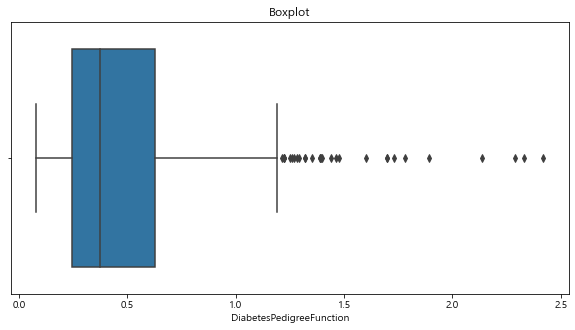

In [160]:
draw_boxplot(df, 'DiabetesPedigreeFunction')

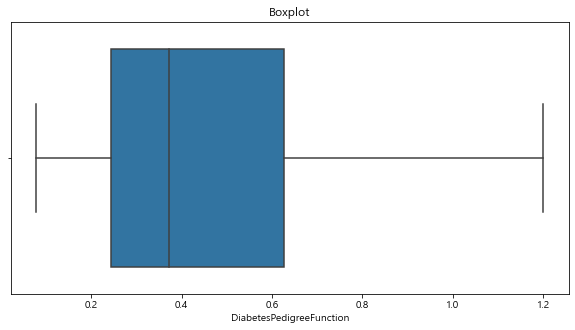

In [161]:
df = replace_outlier(df, 'DiabetesPedigreeFunction')
draw_boxplot(df, 'DiabetesPedigreeFunction')

#### Age(나이)

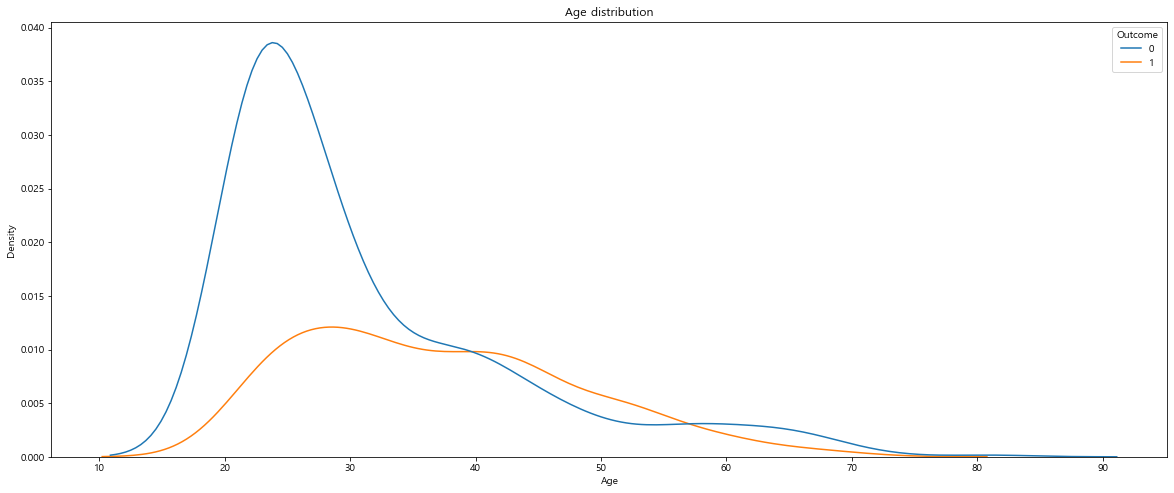

In [162]:
plt.figure(figsize = (20, 8))
sns.kdeplot(x = 'Age', data = df, hue = 'Outcome')
plt.title('Age distribution')
plt.show()

분포가 치우쳐져 있음

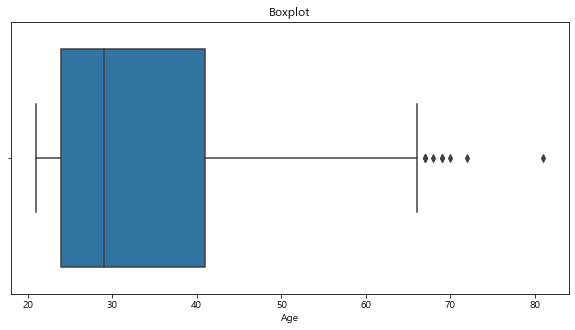

In [163]:
draw_boxplot(df, 'Age')

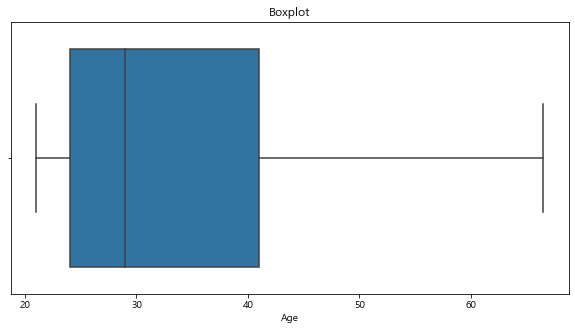

In [164]:
df = replace_outlier(df, 'Age')
draw_boxplot(df, 'Age')

#### Outcome(클래스 결정 값, 0 - No, 1 - Yes)

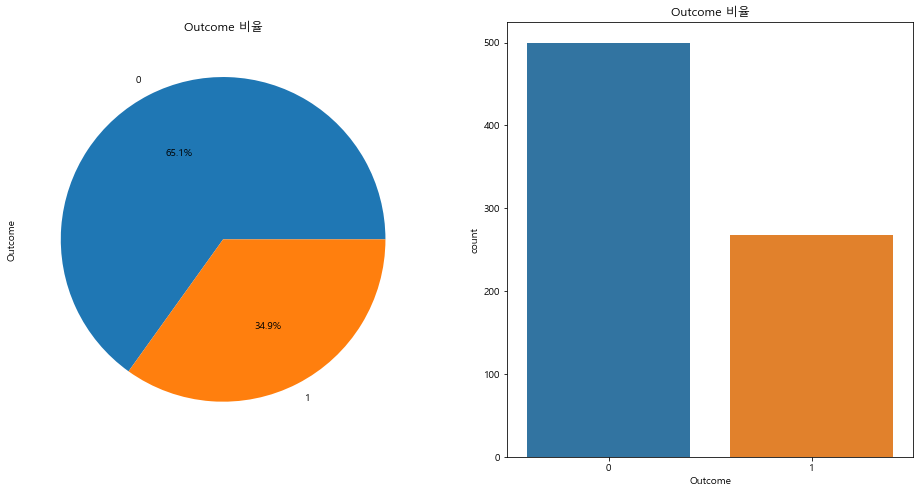

In [172]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))

df['Outcome'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0])
ax[0].set_title('Outcome 비율')

sns.countplot(x = 'Outcome', data = df, ax = ax[1])
ax[1].set_title('Outcome 비율')

plt.show()

#### label encoding

In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
le = LabelEncoder()
le.fit(df['HBP'])

LabelEncoder()

In [182]:
df['HBP'] = le.transform(df['HBP'])

In [184]:
le.fit(df['SkinGrade'])
df['SkinGrade'] = le.transform(df['SkinGrade'])

#### train, test set 분리

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HBP,SkinGrade
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1,1,0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0,1,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1,1,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0,1,1
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1,1,0


In [186]:
from sklearn.model_selection import train_test_split

In [187]:
y = df['Outcome']
x = df.drop('Outcome', axis = 1)

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### Modeling

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#### Logistic Regression

In [195]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
round(lr.score(x_test, y_test) * 100, 2)

77.27

#### random forest

In [194]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train, y_train)
round(rf.score(x_test, y_test) * 100, 2)

73.38

#### Decision Tree

In [196]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
round(dt.score(x_test, y_test) * 100, 2)

72.73

#### SVC

In [214]:
svc = SVC(probability = True)
svc.fit(x_train, y_train)
round(svc.score(x_test, y_test) * 100, 2)

76.62

#### ROC curve

In [206]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color = 'red', label = 'ROC')
    plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

#### Logistic Regression

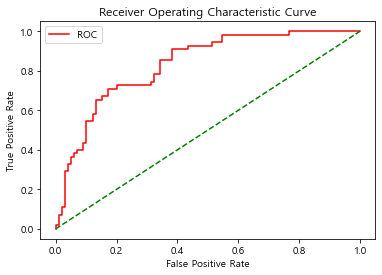

In [207]:
lr_prob = lr.predict_proba(x_test)
lr_prob = lr_prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, lr_prob)
plot_roc_curve(fper, tper)

#### random forest

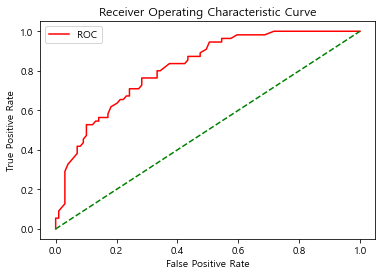

In [208]:
rf_prob = rf.predict_proba(x_test)
rf_prob = rf_prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, rf_prob)
plot_roc_curve(fper, tper)

#### Decision Tree

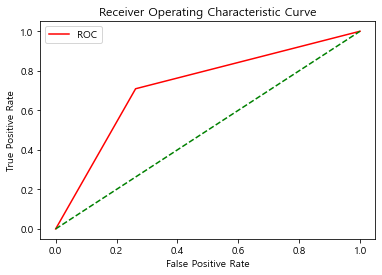

In [211]:
dt_prob = dt.predict_proba(x_test)
dt_prob = dt_prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, dt_prob)
plot_roc_curve(fper, tper)

#### SVC

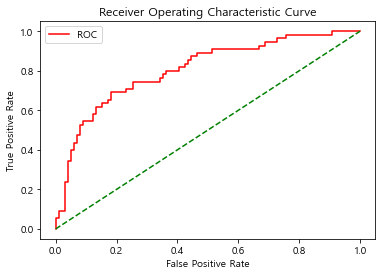

In [215]:
svc_prob = svc.predict_proba(x_test)

svc_prob = svc_prob[:, 1]

fper, tper, thresholds = roc_curve(y_test, svc_prob)
plot_roc_curve(fper, tper)